# Project of Machine Learning 2020
# Name:
Stanislav Kyrychuk
# Matr.-Nummer:
669751

# Part one: Visualization of pctdata.csv

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# import the dataset from file
df = pd.read_csv('../../data/pctdata.csv')

In [22]:
# it shows the data in the table
df.head()

,id_plane,id_x,id_y,i_event,i_time_stamp
0,1,492.0,310.0,32,21600
1,1,493.0,310.0,32,21600
2,1,493.0,311.0,32,21600
3,1,492.0,311.0,32,21600
4,1,493.0,312.0,32,21600


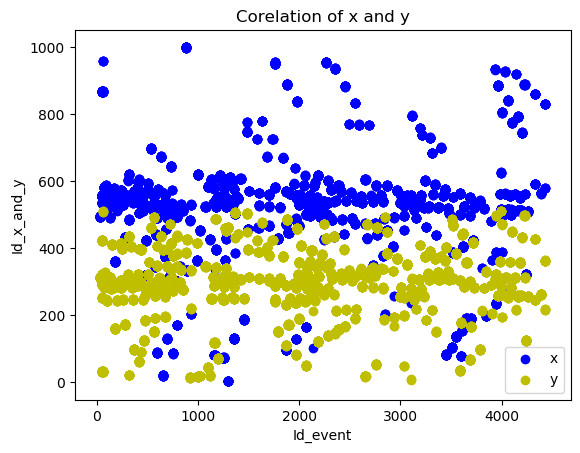

In [23]:
plt.style.use('default')
fig, ax = plt.subplots()

# visualization with scatter plot
ax.scatter(df['i_event'].iloc[0:5000], df['id_x'].iloc[0:5000], color='b', label='x')
ax.scatter(df['i_event'].iloc[0:5000], df['id_y'].iloc[0:5000], color='y', label='y')

# description of x, y and title
ax.set_xlabel('Id_event')
ax.set_ylabel('Id_x_and_y')
ax.set_title('Corelation of x and y')
ax.legend()

Text(0, 0.5, 'Id_y')

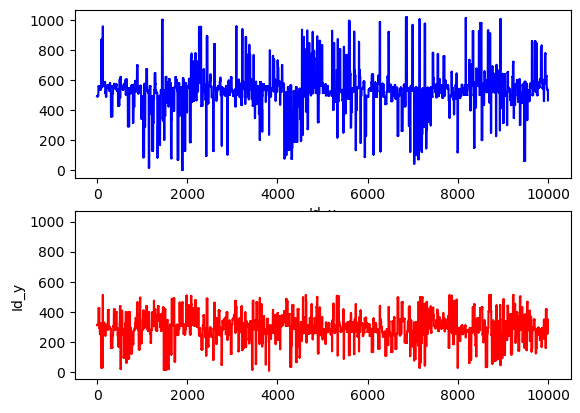

In [24]:
plt.style.use('default')
fig, ax = plt.subplots(2, 1, sharey=True)
ax[0].plot(df['id_x'].iloc[0:10000], color='b')
ax[0].set_xlabel('Id_x')
ax[1].plot(df['id_y'].iloc[0:10000], color='r')
ax[1].set_ylabel('Id_y')

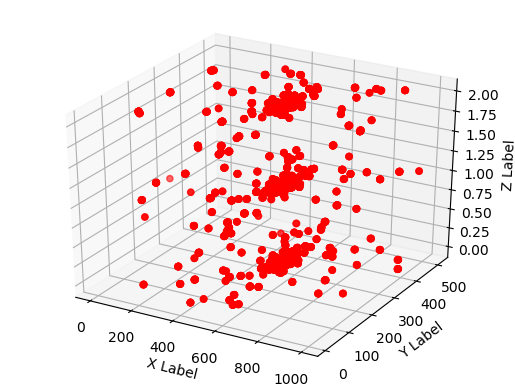

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# visualization with scatter plot in 3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = df['id_x'].iloc[0:5000]
y = df['id_y'].iloc[0:5000]
z = df['id_plane'].iloc[0:5000]
ax.scatter(x, y, z, c='r', marker='o')

# description of x, y and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# To save this picture
fig.savefig("my_figure.png")

# Part two: Unsupervised Learning(clustering)

In [26]:
# Preparation and development in array

x_column = df['id_x'].iloc[:10000]
y_column = df['id_y'].iloc[:10000]
id_plane = df['id_plane'].iloc[:10000]
xy_column = pd.concat([x_column, y_column], axis=1)
samples = xy_column.to_numpy()
chips = id_plane.to_numpy()

In [27]:
# Importing KMeans from sklearn
from sklearn.cluster import KMeans

# Creating a model with 3 clusters(chips)
model = KMeans(n_clusters=3)

# Fitting model to samples
model.fit(samples)

# predicting samples
chips = model.predict(samples)

# Printing the predicted chips
print('NEW Values:')
print(chips)

NEW Values:
[0 0 0 ... 0 0 0]


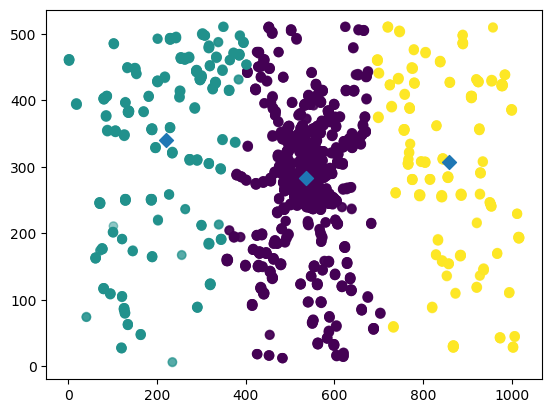

In [28]:
# Using the columns(sx, sy)
sx = samples[:,0]
sy = samples[:,1]

# Showing the scatter plot of xs and ys with different colors
plt.scatter(sx, sy, alpha=0.5, c=chips)

# Determining the centroid
centroids = model.cluster_centers_

# Using of centroids_x, centroids_y
center_x = centroids[:,0]
center_y= centroids[:,1]

# Making the scatter plot with centroids_x and centroids_y
plt.scatter(center_x, center_y, marker='D', s=50)
plt.show()